## Mayank Raj
### 22BAI1118
#### LSMT

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

2024-10-08 10:56:55.420709: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-08 10:56:55.421940: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-08 10:56:55.446907: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-08 10:56:55.447402: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-08 10:56:55.895796: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [12]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

df_train = pd.read_csv('ta-emotion10-trainset.csv')

df_train.head()

,Neutral\tநாளைக்கு அரிசிக்கு இந்த நிலமை வந்தா 🙂
0,Anger\tமானம் கேட்ட அன்புமணி
1,Neutral\tதவறு இஸ்ரேல் இருக்காது இதை நான் கூறவி...
2,Joy\tகொங்கு நாட்டு சிங்கம் உன்மையும் நேர்மையும...
3,Neutral\tஇவர் யார்? ஒவ்வொரு வார்த்தையும் முன்ன...
4,Disguist\tதினமும் ஸ்டாலின் செருப்ப தொடைத்து கொ...


In [16]:

df_train[['Emotion', 'Message']] = df_train['Neutral\tநாளைக்கு அரிசிக்கு இந்த நிலமை வந்தா 🙂'].str.split('\t', expand=True)  
   
df_train.drop('Neutral\tநாளைக்கு அரிசிக்கு இந்த நிலமை வந்தா 🙂', axis=1, inplace=True)

In [17]:
df_train.head()

,Emotion,Message
0,Anger,மானம் கேட்ட அன்புமணி
1,Neutral,தவறு இஸ்ரேல் இருக்காது இதை நான் கூறவில்லை ஹமாஸ...
2,Joy,கொங்கு நாட்டு சிங்கம் உன்மையும் நேர்மையும் உலை...
3,Neutral,இவர் யார்? ஒவ்வொரு வார்த்தையும் முன்னுக்கு பின...
4,Disguist,தினமும் ஸ்டாலின் செருப்ப தொடைத்து கொடுக்குற வன...


In [19]:
X_train=df_train[['Message']]
y_train=df_train[['Emotion']]

In [20]:

df_test = pd.read_csv('ta-emotion10_test.csv')

df_test.head()

,Joy\tஅருமை அற்புதம் பிரமாதம் நண்பரே வாழ்த்துக்கள் நண்பரே வாழ்க வளமுடன் நலமுடன் தொடரட்டும் தங்களது பணி மதுரை சிவசங்கரன் ஆர்டிஸ்ட் திருவல்லிக்கேணி சென்னை
0,Anticipation\tவேல்ராஜ் வேலையா தான் இருக்கும்
1,Joy\tஅண்ணன் கிட்டுக்கு வாழ்த்துக்கள் 👍👍
2,Trust\tஆமா நானும் இதான் யோசித்தேன் 🤣🤣
3,Anticipation\tமொத்த மக்களும் ஒன்னு சேர்ந்தாதான...
4,Neutral\tஇவர் சொன்னது உன் மை


In [21]:
  
df_test[['Emotion', 'Message']] = df_test['Joy\tஅருமை அற்புதம் பிரமாதம் நண்பரே வாழ்த்துக்கள் நண்பரே வாழ்க வளமுடன் நலமுடன் தொடரட்டும் தங்களது பணி மதுரை சிவசங்கரன் ஆர்டிஸ்ட் திருவல்லிக்கேணி சென்னை'].str.split('\t', expand=True)  
  
df_test.drop('Joy\tஅருமை அற்புதம் பிரமாதம் நண்பரே வாழ்த்துக்கள் நண்பரே வாழ்க வளமுடன் நலமுடன் தொடரட்டும் தங்களது பணி மதுரை சிவசங்கரன் ஆர்டிஸ்ட் திருவல்லிக்கேணி சென்னை', axis=1, inplace=True)

In [22]:
X_test=df_test[['Message']]
y_test=df_test[['Emotion']]

In [43]:
df_test.head()

,Emotion,Message
0,Anticipation,வேல்ராஜ் வேலையா தான் இருக்கும்
1,Joy,அண்ணன் கிட்டுக்கு வாழ்த்துக்கள் 👍👍
2,Trust,ஆமா நானும் இதான் யோசித்தேன் 🤣🤣
3,Anticipation,மொத்த மக்களும் ஒன்னு சேர்ந்தாதான் இந்த அரசாங்க...
4,Neutral,இவர் சொன்னது உன் மை


In [27]:
num_classes =y_train['Emotion'].nunique()
print(f"Number of unique classes in the 'Type' column: {num_classes}")

Number of unique classes in the 'Type' column: 11


In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14207, 1)
(3551, 1)
(14207, 1)
(3551, 1)


In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [34]:

max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train['Message'])


In [35]:
tokenizer.fit_on_texts(X_test['Message'])

In [36]:
tokenizer.fit_on_texts(y_train['Emotion'])
tokenizer.fit_on_texts(y_test['Emotion'])

In [38]:
X_train = tokenizer.texts_to_sequences(X_test['Message'])
X_test = tokenizer.texts_to_sequences(X_test['Message'])

X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

In [39]:
le = LabelEncoder()
y_train = le.fit_transform(y_test['Emotion'])
y_test = le.transform(y_test['Emotion'])

In [40]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=11)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=11)

In [41]:

model_simple = tf.keras.Sequential([  
    tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
    tf.keras.layers.LSTM(64, return_sequences=False), 
    tf.keras.layers.Dense(11, activation='softmax')  
])  
model_simple.summary()  
  
model_simple.compile(optimizer='adam',  
            loss='categorical_crossentropy',  
            metrics=['accuracy'])  
  
history = model_simple.fit(X_train, y_train,  
                batch_size=batch_size,  
                epochs=epochs,  
                validation_split=0.2,  
                verbose=1)  
  
test_loss, test_acc = model_simple.evaluate(X_test, y_test)  
print(f'\nTest Accuracy: {test_acc:.4f}')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 11)                715       
                                                                 
Total params: 1330123 (5.07 MB)
Trainable params: 1330123 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-10-08 11:32:24.955662: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-08 11:32:24.956276: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/8
89/89 [==============================] - 3s 24ms/step - loss: 2.0748 - accuracy: 0.3451 - val_loss: 2.0129 - val_accuracy: 0.3404
Epoch 2/8
89/89 [==============================] - 2s 22ms/step - loss: 2.0204 - accuracy: 0.3451 - val_loss: 2.0107 - val_accuracy: 0.3404
Epoch 3/8
89/89 [==============================] - 2s 22ms/step - loss: 2.0193 - accuracy: 0.3458 - val_loss: 2.0051 - val_accuracy: 0.3404
Epoch 4/8
89/89 [==============================] - 2s 22ms/step - loss: 2.0165 - accuracy: 0.3454 - val_loss: 2.0116 - val_accuracy: 0.3404
Epoch 5/8
89/89 [==============================] - 2s 22ms/step - loss: 2.0169 - accuracy: 0.3458 - val_loss: 2.0093 - val_accuracy: 0.3404
Epoch 6/8
89/89 [==============================] - 2s 22ms/step - loss: 2.0190 - accuracy: 0.3461 - val_loss: 2.0067 - val_accuracy: 0.3404
Epoch 7/8
89/89 [==============================] - 2s 22ms/step - loss: 2.0161 - accuracy: 0.3465 - val_loss: 2.0034 - val_accuracy: 0.3404
Epoch 8/8
111/111 [=

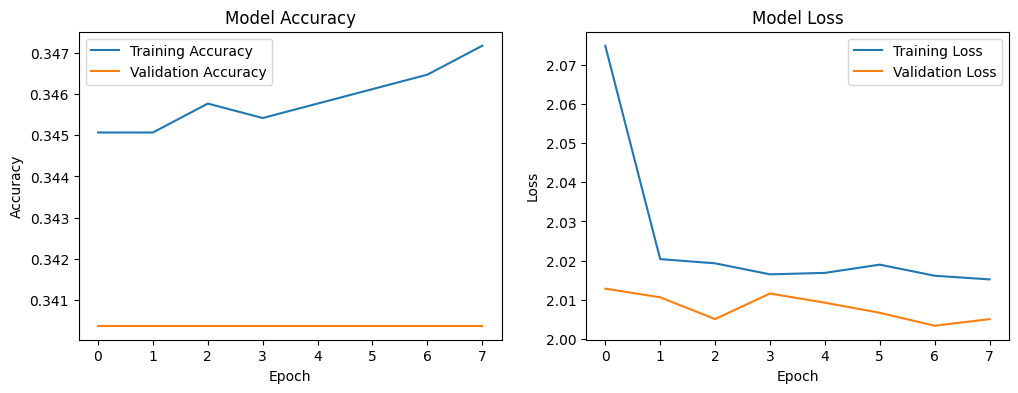

In [42]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()